# Creazione del file PyCalcolAr (file excel CalcolAr automatizzato in codice Python)

### Importare le librerie utili per la creazione del codice 

In [9]:
import pandas as pd
import numpy as np
import math 

from IPython.display import display

### Importare il file triplo36 (file di calibrazione dell'aria)
                                 
#### per importare il file definire il percorso (file_path, dove trovare il file sul computer)                              

In [10]:
# da modificare manualmente dall'utente  
delay = 246 

In [11]:
# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0', 'Run', 'Path']

# trasformare le colonne in dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'gain IC0/IC1', 'err gain IC0/IC1', 'gain F/IC1', 'err gain F/IC1' , 'gain F/IC0', 'err gain F/IC0', '40F/36IC1', 'err 40F/36IC1 ', '40F/36F', 'err 40F/36F', '40F/36IC0', 'err 40F/36IC0' , '38IC0/36IC0', 'err 38IC0/36IC0']

# definire il percorso del file
file_path = "../test_data/Triplo36.txt"

# importare il file
# utilizzare due caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python') 

In [12]:
# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0','36F', 'err 36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

display(airpipette_data)  

Air pipette initial imported data:


,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Run,Path
0,0.73900,0.00400,49900.0,58.0,72000.0,230.0,259000.0,160.0,144000.0,1300.0,'Sample Name' run on 06 October 2015 at 10:33,Raw data stored in - C:\Nu Noble\Results\Data...
1,1.22000,0.00041,49700.0,60.0,75600.0,200.0,258000.0,160.0,251000.0,870.0,'Sample Name' run on 06 October 2015 at 10:52,Raw data stored in - C:\Nu Noble\Results\Data...
2,1.22000,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,'Sample Name' run on 06 October 2015 at 11:23,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.75800,0.00400,49700.0,55.0,66600.0,230.0,258000.0,140.0,144000.0,1100.0,'Sample Name' run on 08 October 2015 at 10:13,Raw data stored in - C:\Nu Noble\Results\Data...
4,1.09000,0.00036,43300.0,63.0,60800.0,170.0,224000.0,130.0,220000.0,1400.0,'Sample Name' run on 08 October 2015 at 10:27,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...
829,1.65538,0.00053,55318.2,79.0,307546.0,250.0,298052.0,240.0,347513.0,1100.0,'Sample Name' run on 23 June 2020 at 11:02,Raw data stored in - C:\Nu Noble\Results\Data...
830,1.65331,0.00043,55167.7,90.0,305585.0,220.0,297394.0,300.0,349141.0,1300.0,'Sample Name' run on 24 June 2020 at 09:25,Raw data stored in - C:\Nu Noble\Results\Data...
831,1.65039,0.00049,55606.8,82.0,306701.0,200.0,299474.0,260.0,347983.0,1300.0,'Sample Name' run on 24 June 2020 at 09:50,Raw data stored in - C:\Nu Noble\Results\Data...
832,1.64847,0.00056,55592.8,63.0,306848.0,260.0,299066.0,230.0,346598.0,1400.0,'Sample Name' run on 24 June 2020 at 10:08,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare il dataframe per data
#### (per poter scegliere la riga di calibrazione d'interesse)

In [13]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)

display(airpipette_data)

,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
0,Sample Name,2015-10-06 10:33:00,0.73900,0.00400,49900.0,58.0,72000.0,230.0,259000.0,160.0,144000.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2015-10-06 10:52:00,1.22000,0.00041,49700.0,60.0,75600.0,200.0,258000.0,160.0,251000.0,870.0,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-10-06 11:23:00,1.22000,0.00051,49800.0,51.0,76800.0,190.0,259000.0,150.0,251000.0,910.0,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-10-08 10:13:00,0.75800,0.00400,49700.0,55.0,66600.0,230.0,258000.0,140.0,144000.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-10-08 10:27:00,1.09000,0.00036,43300.0,63.0,60800.0,170.0,224000.0,130.0,220000.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Sample Name,2020-06-23 11:02:00,1.65538,0.00053,55318.2,79.0,307546.0,250.0,298052.0,240.0,347513.0,1100.0,Raw data stored in - C:\Nu Noble\Results\Data...
830,Sample Name,2020-06-24 09:25:00,1.65331,0.00043,55167.7,90.0,305585.0,220.0,297394.0,300.0,349141.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
831,Sample Name,2020-06-24 09:50:00,1.65039,0.00049,55606.8,82.0,306701.0,200.0,299474.0,260.0,347983.0,1300.0,Raw data stored in - C:\Nu Noble\Results\Data...
832,Sample Name,2020-06-24 10:08:00,1.64847,0.00056,55592.8,63.0,306848.0,260.0,299066.0,230.0,346598.0,1400.0,Raw data stored in - C:\Nu Noble\Results\Data...


In [14]:
# Conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)

#airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
#airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
#airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
#airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
#airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
#airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
#airpipette_data.loc[:,'36F'] = airpipette_data.loc[:,'36F'].values / 62415000
#airpipette_data.loc[:,'err 36F'] = airpipette_data.loc[:,'err 36F'].values / 62415000

#airpipette_data



### Utente: selezionare la data d'interesse nell'elenco qui sotto

In [16]:
# filtrare il dataframe per data, prendendo una sola riga 
import ipywidgets as widgets

# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
                 value=airpipette_data['Date_Time'].to_list()[-1],
                 description='Date_Time of calibration:',
                 disabled=False)

display(data_w)

Dropdown(description='Date_Time of calibration:', index=833, options=(Timestamp('2015-10-06 10:33:00'), Timest…

In [18]:
print(data_w.value)
airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w.value]

calibration_data = airpipette_data_filtered 

display(calibration_data)

2020-06-29 09:41:00


,Run_Name,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,36F,err 36F,Path
833,Sample Name,2020-06-29 09:41:00,1.65661,0.00047,54386.0,85.0,305470.0,280.0,293720.0,330.0,346964.0,1200.0,Raw data stored in - C:\Nu Noble\Results\Data...


### Importare i file Run4 e Run22 
#### (con i medesimi passaggi svolti per triplo36)

In [19]:
# definire la lista con gli indici delle colonne 
column_names_run4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']
column_names_run22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0', 'Run', 'Path']

# definire il percorso dei file
file_path_4 = "../test_data/Run4.txt"
file_path_22 = "../test_data/Run22.txt"

# importare i file run
df_data_4 = pd.read_csv(file_path_4, header = None, index_col= False, names = column_names_run4, sep = '\t|,', engine = 'python')
df_data_22 = pd.read_csv(file_path_22, header = None, index_col= False, names = column_names_run22, sep = '\t|,', engine = 'python')

In [20]:
# eliminare i caratteri "{}" dalle colonne
df_data_4 = df_data_4.replace(["{", "}"], ["", ""], regex=True)
df_data_22 = df_data_22.replace(["{", "}"], ["", ""], regex=True)

In [21]:
# definire nome delle colonne che contengono dati numerici
colnames_numeric_4 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', 'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']   
colnames_numeric_22 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1','38Ar F', 'err38Ar F','36Ar IC0', 'err36Ar IC0', '39Ar F', 'err39Ar F', '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1' , '40F/36IC1',  'err40F/36IC1',  '40F/36IC0' ,'err40F/36IC0']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_4:
    df_data_4[i] = pd.to_numeric(df_data_4[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_22:
    df_data_22[i] = pd.to_numeric(df_data_22[i])

#### Dopo aver importato i due file come dataframe, verranno uniti a formare un unico dataframe 
### Unire Run4 con Run22

In [22]:
df_data = pd.concat([df_data_4, df_data_22], axis=0)

display(df_data)

,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,36Ar IC0,err36Ar IC0,...,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Run,Path
0,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,0.002610,1.300000e-06,...,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,'fishcanyon bt stp1' run on 08 April 2015 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
1,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,0.006510,2.500000e-06,...,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,'fishcanyon bt stp2' run on 08 April 2015 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
2,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,0.003050,1.400000e-06,...,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,'Sample Name' run on 08 April 2015 at 17:28,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,0.000259,2.900000e-07,...,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,'Sample Name' run on 09 April 2015 at 11:39,Raw data stored in - C:\Nu Noble\Results\Data...
4,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,0.001700,8.900000e-07,...,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,'Sample Name' run on 09 April 2015 at 12:11,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,0.000881,8.000000e-07,...,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,'BAL-T12 LG ST2' run on 23 June 2020 at 15:31,Raw data stored in - C:\Nu Noble\Results\Data...
1334,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,0.000268,4.100000e-07,...,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,'BAL-T12 LG ST3' run on 23 June 2020 at 15:57,Raw data stored in - C:\Nu Noble\Results\Data...
1335,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,0.000749,6.800000e-07,...,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,'BAL-T12 LG ST6' run on 23 June 2020 at 17:08,Raw data stored in - C:\Nu Noble\Results\Data...
1336,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,0.000581,6.800000e-07,...,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,'BAL-T12 ST7' run on 23 June 2020 at 17:26,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare il dataframe per data
#### (come abbiamo fatto per triplo36)

In [23]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le due nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,fishcanyon bt stp1,2015-04-08 16:03:00,0.847000,0.000370,0.000493,3.700000e-07,0.002460,3.900000e-06,0.000047,0.000015,...,6.600000e-09,0.396,0.064,1.060000,0.0018,345.000,0.57,325.000,0.21,Raw data stored in - C:\Nu Noble\Results\Data...
1,fishcanyon bt stp2,2015-04-08 16:33:00,2.300000,0.000870,0.001540,8.500000e-07,0.006340,9.200000e-06,0.000107,0.000013,...,1.000000e-08,2.670,0.018,1.030000,0.0015,363.000,0.55,354.000,0.19,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2015-04-08 17:28:00,1.080000,0.000350,0.000750,5.000000e-07,0.002850,5.400000e-06,0.000037,0.000012,...,8.200000e-09,4.340,0.029,1.070000,0.0021,378.000,0.72,354.000,0.20,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2015-04-09 11:39:00,0.089300,0.000040,0.000059,1.300000e-07,0.000215,2.700000e-07,0.000009,0.000012,...,4.400000e-08,2.160,0.260,1.210000,0.0020,416.000,0.55,345.000,0.41,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,2015-04-09 12:11:00,0.578000,0.000270,0.000329,3.000000e-07,0.001530,2.400000e-06,0.000050,0.000011,...,6.400000e-09,48700.000,48000.000,1.110000,0.0018,378.000,0.61,340.000,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,BAL-T12 LG ST2,2020-06-23 15:31:00,0.426141,0.000120,0.003709,2.600000e-06,0.000883,7.200000e-07,0.004290,0.000017,...,NaN,NaN,NaN,0.997925,0.0012,482.535,0.42,483.538,0.46,Raw data stored in - C:\Nu Noble\Results\Data...
1334,BAL-T12 LG ST3,2020-06-23 15:57:00,0.224427,0.000066,0.003784,2.800000e-06,0.000268,4.000000e-07,0.004378,0.000017,...,NaN,NaN,NaN,1.003020,0.0022,838.663,1.30,836.139,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
1335,BAL-T12 LG ST6,2020-06-23 17:08:00,0.421204,0.000130,0.004853,3.600000e-06,0.000743,7.200000e-07,0.005579,0.000016,...,NaN,NaN,NaN,1.008230,0.0013,567.014,0.58,562.386,0.54,Raw data stored in - C:\Nu Noble\Results\Data...
1336,BAL-T12 ST7,2020-06-23 17:26:00,0.585912,0.000160,0.011360,1.100000e-05,0.000572,6.300000e-07,0.012936,0.000016,...,NaN,NaN,NaN,1.015770,0.0016,1024.300,1.20,1008.400,1.20,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare set di dati per data

In [24]:
type(df_data['Date_Time'])

# filtrare il dataframe per data 
filter_data_min = pd.Timestamp(year=2020, month=6, day=24, hour=8)
filter_data_max = pd.Timestamp(year=2020, month=6, day=24, hour=20)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & \
                                           (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,38Ar F,err38Ar F,...,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40F/36IC1,err40F/36IC1,40F/36IC0,err40F/36IC0,Path
0,TOM SM ST1,2020-06-24 11:19:00,0.143381,0.000050,0.000129,2.500000e-07,0.000410,4.800000e-07,0.000205,0.000018,...,5.600000e-08,1.45045,0.1300,0.960810,0.00160,349.708,0.43,363.972,0.45,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2020-06-24 11:47:00,0.646386,0.000210,0.000391,4.200000e-07,0.001882,1.300000e-06,0.000501,0.000016,...,6.800000e-08,1.28278,0.0660,0.970343,0.00088,343.386,0.26,353.881,0.24,Raw data stored in - C:\Nu Noble\Results\Data...
2,TOM SM ST3,2020-06-24 12:08:00,0.113456,0.000036,0.000180,2.900000e-07,0.000300,4.200000e-07,0.000225,0.000017,...,6.100000e-08,1.21714,0.0230,0.971918,0.00180,378.730,0.55,389.672,0.50,Raw data stored in - C:\Nu Noble\Results\Data...
3,TOM SM ST4,2020-06-24 12:29:00,0.140526,0.000047,0.000288,4.000000e-07,0.000351,4.000000e-07,0.000363,0.000017,...,6.500000e-08,1.21116,0.0120,0.982168,0.00170,400.302,0.47,407.569,0.53,Raw data stored in - C:\Nu Noble\Results\Data...
4,TOM SM ST5,2020-06-24 12:57:00,0.341902,0.000110,0.000471,4.300000e-07,0.000922,7.800000e-07,0.000567,0.000017,...,5.600000e-08,1.18115,0.0089,0.979210,0.00110,370.815,0.33,378.688,0.31,Raw data stored in - C:\Nu Noble\Results\Data...


### Operazioni derivate dal file di calibrazione triplo36 (foglio Excel sample_data)

#### per calcolare 1sig_rel (errore relativo) = err / 36Ar (IC0 o IC1 in base al collettore usato)

In [25]:
value_err36IC0 = float(calibration_data['err 36IC0'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

print ('1sig_rel_36IC0', sig_rel_36IC0)

1sig_rel_36IC0 0.00112351899768487


In [26]:
value_err36IC1 = float(calibration_data['err 36IC1'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

print ('1sig_rel_36IC1', sig_rel_36IC1)

1sig_rel_36IC1 0.000916620290044849


In [27]:
value_err36F = float(calibration_data['err 36F'].values)
value_36F = float(calibration_data['36F'].values)
sig_rel_36F = float(value_err36F / value_36F)

print ('1sig_rel_36F', sig_rel_36F)

1sig_rel_36F 0.0034585720708776705


In [28]:
# calcolo gain F/IC0

value_36F = float(calibration_data['36F'].values)
value_36IC0 = float(calibration_data['36IC0'].values)
gain_F_IC0 = float(value_36F / value_36IC0)

print ('gain F/IC0', gain_F_IC0)

gain F/IC0 1.1812746833719188


In [29]:
# calcolo l'errore assoluto del gain F/IC0

sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/ICO', sig_abs_F_ICO)

sig_abs_F/ICO 0.0042956864573216935


In [30]:
# calcolo gain F/IC1 

value_36F = float(calibration_data['36F'].values)
value_36IC1 = float(calibration_data['36IC1'].values)
gain_F_IC1 = float(value_36F / value_36IC1)

print ('gain F/IC1: ', gain_F_IC1)

gain F/IC1:  1.1358365796968606


In [31]:
# calcolo l'errore assoluto del gain F/IC1

sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

print ('sig_abs_F/IC1', sig_abs_F_IC1)

sig_abs_F/IC1 0.004063996223501063


In [32]:
# calcolo 36IC0 correzione gain

corr_gain_36IC0 = value_36IC0 * gain_F_IC0

print ('corr_gain_36IC0: ', corr_gain_36IC0) 

corr_gain_36IC0:  346964.0


In [33]:
# calcolo 40/36 correzione

value_40F = float(calibration_data['40F'].values)
B = 62415000 #aggiungere descrizione della constante
corr_40_36 = (value_40F * B) / corr_gain_36IC0

print ('corr_40_36: ', corr_40_36)

corr_40_36:  298.0058828869854


In [34]:
# calcolo l'errore assoluto del 40/36 correzione

sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / calibration_data['40F'].values, 2))**(1/2)

print ('sig_abs_40/36', sig_abs_40_36)

sig_abs_40/36 [1.0341368]


In [35]:
# calcolo source frax 

source_frax = float(corr_40_36 / 298.56)

print ('source_frax: ', source_frax)

source_frax:  0.9981440343213605


In [36]:
# calcolo l'errore assoluto di source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print ('sig_abs_source_frax', sig_abs_source_frax)

sig_abs_source_frax [0.00346375]


#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr

### Tabella: BACKGROUND SPECTROMETER
#### (da modificare manualmente dall'utente, valori misurati 4/5 di volte l'anno)

In [37]:
update_data = pd.Timestamp(year=2021, month=1, day=23)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.0040, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2021-01-23 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.004,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (valori costanti, non sono da modificare)

In [38]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, np.nan],
                                '(36Ar/37Ar) Ca': [0.000255, 0.015],
                                '(38Ar/37Ar) Ca': [0.00027, 0.015],
                                '(39Ar/37Ar) Ca': [0.00067, 0.015],
                                'Lambda Ar37 [1/d]': [0.019748, np.nan],
                                'Lambda Ar40 [1/Ma]': [0.0005543, np.nan],
                                'Interference 40K': [0.033, 0.01],
                                'Coefficient 39Ar for J': [143, np.nan],
                                'Coefficient Ca/K': [1.94, np.nan],
                                'Coefficient Cl/K': [0.178, np.nan]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,NaN
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,NaN
Lambda Ar40 [1/Ma],0.000554,NaN
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,NaN
Coefficient Ca/K,1.940000,NaN
Coefficient Cl/K,0.178000,NaN


### Tabella: IRRADIATIONS
#### (da modificare manualmente dall'utente)

In [39]:
# sample_weight, da modificare manuelmente dall'utente (cambia per ogni campione) 
sample_weight = 0.00034

# J_factor e J_factor_errors, da modificare manuelmente dall'utente (cambia per ogni campione) 
J_factor = 0.0011422
J_factor_errors = 0.0005

# sensitivity, da modificare manuelmente dall'utente (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice
gain_F_IC0 = gain_F_IC0 # già calcolato precedentemente  

gain_rel_uncertainty_errors = calibration_data['err 40F'].values / calibration_data['err 36F'].values
gain_rel_uncertainty = gain_rel_uncertainty_errors / gain_F_IC0

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio', 'value']

pipette_rel_uncertainty = sig_abs_source_frax  
total_fractionation_uncertainty = sig_abs_source_frax 


irradiations_dict = {'Sample weight [g]': [sample_weight, np.nan],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, np.nan],
                     'Gain F/IC0': [gain_F_IC0, np.nan],
                     'Gain rel uncertainty': [gain_rel_uncertainty[0], gain_rel_uncertainty_errors[0]],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], np.nan],
                     'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]], 
                     'Pipette rel uncertainty': [pipette_rel_uncertainty[0], np.nan],
                     'Total fractionation uncertainty': [total_fractionation_uncertainty[0], np.nan]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],3.400000e-04,NaN
J factor,1.142200e-03,5.000000e-04
Sensitivity (mL/mV),3.370000e-11,NaN
Gain F/IC0,1.181275e+00,NaN
Gain rel uncertainty,3.315627e-07,3.916667e-07
Measured 40Ar/36Ar pipettes,5.423151e-06,NaN
Gain corrected 40Ar/36Ar pipettes,4.590932e-06,1.537691e-08
Pipette rel uncertainty,3.463749e-03,NaN
Total fractionation uncertainty,3.463749e-03,NaN


### Operazioni foglio Excel CalcolAr = file PyCalcolAr

#### Le operazione verranno aggiunte in un unico dataframe di risultati simile a quelle del file Excel CalcolAr


In [41]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (da modificare manualmente dall'utente)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246


### Input = online Regression

In [42]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '39Ar'] = df_data.loc[:, '39Ar F'].values * 1000
input_data_df.loc[:, 'err39Ar'] = df_data.loc[:, 'err39Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar F'].values * 1000

input_data_df.loc[:, '37Ar'] = df_data.loc[:, '37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err37Ar'] = df_data.loc[:, 'err37Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC0'].values * df_data.loc[:, 'gainF/IC0'].values * 1000

display(input_data_df)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815


### Measured values corrected for mass spectrometer background

In [44]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630


In [45]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000


In [46]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322


In [47]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349,0.192045
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325,0.299842
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317,0.919371
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335,1.696970
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322,2.250630


In [48]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349,0.192045,0.018002
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325,0.299842,0.016003
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317,0.919371,0.018002
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335,1.696970,0.017003
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322,2.250630,0.017003


In [50]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555


In [51]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.127707
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.389718
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.178522
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.287412
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.469661


In [52]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,36Ar,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,0.571383,0.000682,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.127707,0.018
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,2.343075,0.001411,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.389718,0.016
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,0.354380,0.000438,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.178522,0.017
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,0.417596,0.000521,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.287412,0.017
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,1.066412,0.000815,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.469661,0.017


In [53]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err36Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.000682,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.127707,0.018,0.140950
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.001411,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.389718,0.016,0.041056
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.000438,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.178522,0.017,0.095228
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.000521,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.287412,0.017,0.059150
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000815,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.469661,0.017,0.036197


In [54]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,143.372564,0.050000,0.000349,0.192045,0.018002,0.093741,0.127707,0.018,0.140950,0.004403
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,646.374006,0.210000,0.000325,0.299842,0.016003,0.053371,0.389718,0.016,0.041056,0.004815
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,113.423562,0.036001,0.000317,0.919371,0.018002,0.019581,0.178522,0.017,0.095228,0.003137
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,140.467901,0.047000,0.000335,1.696970,0.017003,0.010019,0.287412,0.017,0.059150,0.003464
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,341.825630,0.110000,0.000322,2.250630,0.017003,0.007555,0.469661,0.017,0.036197,0.003430


In [55]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.050000,0.000349,0.192045,0.018002,0.093741,0.127707,0.018,0.140950,0.004403,0.000805
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.210000,0.000325,0.299842,0.016003,0.053371,0.389718,0.016,0.041056,0.004815,0.000805
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.036001,0.000317,0.919371,0.018002,0.019581,0.178522,0.017,0.095228,0.003137,0.000803
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.047000,0.000335,1.696970,0.017003,0.010019,0.287412,0.017,0.059150,0.003464,0.000803
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.110000,0.000322,2.250630,0.017003,0.007555,0.469661,0.017,0.036197,0.003430,0.000804


In [56]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.000349,0.192045,0.018002,0.093741,0.127707,0.018,0.140950,0.004403,0.000805,0.182788
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.000325,0.299842,0.016003,0.053371,0.389718,0.016,0.041056,0.004815,0.000805,0.167251
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.000317,0.919371,0.018002,0.019581,0.178522,0.017,0.095228,0.003137,0.000803,0.255854
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.000335,1.696970,0.017003,0.010019,0.287412,0.017,0.059150,0.003464,0.000803,0.231760
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000322,2.250630,0.017003,0.007555,0.469661,0.017,0.036197,0.003430,0.000804,0.234364


In [57]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.192045,0.018002,0.093741,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.299842,0.016003,0.053371,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.919371,0.018002,0.019581,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.696970,0.017003,0.010019,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,2.250630,0.017003,0.007555,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912


In [58]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.018002,0.093741,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.016003,0.053371,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.018002,0.019581,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.017003,0.010019,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.017003,0.007555,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817


In [59]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.093741,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.053371,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.019581,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.010019,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.007555,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766


### 37Ar decay

In [60]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
 #                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
 #                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                        results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.127707,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.389718,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.178522,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.287412,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.469661,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [61]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.018,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.016,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.017,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.017,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.017,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08


In [63]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.140950,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.041056,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.095228,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.059150,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.036197,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5


In [64]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.004403,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.004815,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.003137,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.003464,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.003430,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75


### Bg + Fract + Decay Corrected 

In [65]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.000805,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75,8.778419e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.000805,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75,3.602157e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.000803,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75,5.441583e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.000803,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75,6.413647e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000804,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75,1.639044e-08


In [66]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.182788,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.167251,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.255854,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.231760,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.234364,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547


In [67]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.570883,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,2.342575,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.353880,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.417096,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.065912,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831


In [68]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.000684,0.001197,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.001412,0.000603,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.000441,0.001246,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.000523,0.001254,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000817,0.000766,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238


In [69]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.001197,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.000603,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.001246,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.001254,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000766,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973


In [70]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,130.043076,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,130.043076,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,130.043076,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,130.043076,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,130.043076,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604


In [71]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                 (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,1.537691e-08,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.537691e-08,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,1.537691e-08,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.537691e-08,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.537691e-08,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09


In [72]:
results_data.loc[:,'1sigRel37corr'] = (((pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                         pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2)) * 9) / 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.5,0.75,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.5,0.75,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.5,0.75,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.5,0.75,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.5,0.75,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792


### Interference Corrected

In [75]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431


In [76]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,8.778419e-09,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.602157e-08,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,5.441583e-09,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,6.413647e-09,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.639044e-08,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431


In [77]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.003665,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.003516,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.003681,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.003684,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.003547,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13


In [79]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.063854,0.140960,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.194859,0.041093,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.089261,0.095244,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.143706,0.059175,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.234831,0.036238,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973


In [80]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.140960,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.041093,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.095244,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.059175,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.036238,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835


In [81]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.144034,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.224882,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.689528,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.272728,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.687973,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13


In [82]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.093745,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.053378,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.019600,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.010057,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.007604,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431


In [83]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,4.402596e-09,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,4.814192e-09,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,3.136400e-09,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,3.463199e-09,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,3.429573e-09,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13


In [84]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.137116,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.125465,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.191908,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.173840,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.175792,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08


In [85]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,2.949739e-12,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.225509e-12,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,2.101388e-12,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,2.320343e-12,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,2.297814e-12,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11


In [86]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.137934,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.126358,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.192493,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.174486,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.176431,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548


In [87]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,4.068682e-13,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,4.075704e-13,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,4.045034e-13,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,4.048668e-13,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,4.054056e-13,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005


In [88]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.144034,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.224882,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.689528,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.272728,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.687973,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08


In [89]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.013502,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.012004,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.013515,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.012800,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.012835,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625


In [90]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,1.122662e-12,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561,0.050000
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.227619e-12,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995,0.210000
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,7.997821e-13,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560,0.036001
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,8.831157e-13,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899,0.047000
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,8.745411e-13,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625,0.110000


In [91]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.137934,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561,0.050000,1.0
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.126358,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995,0.210000,1.0
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.192493,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560,0.036001,1.0
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.174486,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899,0.047000,1.0
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.176431,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625,0.110000,1.0


In [92]:
results_data.loc[:,'error magnif'] = 1 - (results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,1.548528e-13,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561,0.050000,1.0,1.0
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.551201e-13,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995,0.210000,1.0,1.0
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,1.539528e-13,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560,0.036001,1.0,1.0
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.540911e-13,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899,0.047000,1.0,1.0
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.542962e-13,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625,0.110000,1.0,1.0


In [93]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,8.777297e-09,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.602034e-08,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,5.440783e-09,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,6.412764e-09,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.638956e-08,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548


In [94]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,3.217203e-11,0.003665,0.000003,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665,0.000349
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.266447e-10,0.003516,0.000011,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516,0.000325
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,2.003170e-11,0.003682,0.000002,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682,0.000317
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,2.362764e-11,0.003684,0.000002,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684,0.000335
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,5.814437e-11,0.003548,0.000005,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548,0.000322


In [95]:
results_data.loc[:,'Ar38Cl'] = (results_data.loc[:,'Ar38tot'].values - results_data.loc[:,'Ar39K'].values) / 90 - \
                               (results_data.loc[:,'Ar36Atm'].values * 0.18855) - \
                               (results_data.loc[:,'Ar37day0'].values * 0.00027)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.003665,0.000003,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665,0.000349,-0.000891
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.003516,0.000011,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516,0.000325,-0.000334
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.003682,0.000002,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682,0.000317,-0.006670
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.003684,0.000002,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684,0.000335,-0.012545
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.003548,0.000005,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548,0.000322,-0.016146


In [96]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                     results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.000003,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665,0.000349,-0.000891,0.140961
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.000011,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516,0.000325,-0.000334,0.041093
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.000002,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682,0.000317,-0.006670,0.095244
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.000002,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684,0.000335,-0.012545,0.059175
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.000005,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548,0.000322,-0.016146,0.036239


In [97]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,9.605282e-09,143.372561,0.050000,1.0,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,3.781104e-08,646.373995,0.210000,1.0,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,5.980665e-09,113.423560,0.036001,1.0,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,7.054268e-09,140.467899,0.047000,1.0,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.735958e-08,341.825625,0.110000,1.0,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433


### RESULTS

In [98]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,143.372561,0.050000,1.0,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,646.373995,0.210000,1.0,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,113.423560,0.036001,1.0,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,140.467899,0.047000,1.0,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,341.825625,0.110000,1.0,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08


In [99]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,0.050000,1.0,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,0.210000,1.0,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,0.036001,1.0,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,0.047000,1.0,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,0.110000,1.0,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12


In [100]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,1.0,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.0,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,1.0,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.0,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.0,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08


In [101]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,143.381,0.050,0.195045,0.018,0.128707,0.018,0.008403,0.000088,...,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12
1,1,246,646.386,0.210,0.302842,0.016,0.390718,0.016,0.008815,0.000092,...,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12
2,1,246,113.456,0.036,0.922371,0.018,0.179522,0.017,0.007137,0.000065,...,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12
3,1,246,140.526,0.047,1.699970,0.017,0.288412,0.017,0.007464,0.000067,...,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12
4,1,246,341.902,0.110,2.253630,0.017,0.470661,0.017,0.007430,0.000079,...,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12


In [102]:
results_data.loc[:,'39Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,143.381,0.050,4.853937e-12,0.018,0.128707,0.018,0.008403,0.000088,...,1.0,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12
1,1,246,646.386,0.210,7.578507e-12,0.016,0.390718,0.016,0.008815,0.000092,...,1.0,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12
2,1,246,113.456,0.036,2.323710e-11,0.018,0.179522,0.017,0.007137,0.000065,...,1.0,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12
3,1,246,140.526,0.047,4.289092e-11,0.017,0.288412,0.017,0.007464,0.000067,...,1.0,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12
4,1,246,341.902,0.110,5.688467e-11,0.017,0.470661,0.017,0.007430,0.000079,...,1.0,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12


In [103]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,0.128707,0.018,0.008403,0.000088,...,0.003665,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13
1,1,246,646.386,0.210,7.578507e-12,0.016,0.390718,0.016,0.008815,0.000092,...,0.003516,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13
2,1,246,113.456,0.036,2.323710e-11,0.018,0.179522,0.017,0.007137,0.000065,...,0.003682,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13
3,1,246,140.526,0.047,4.289092e-11,0.017,0.288412,0.017,0.007464,0.000067,...,0.003684,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13
4,1,246,341.902,0.110,5.688467e-11,0.017,0.470661,0.017,0.007430,0.000079,...,0.003548,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13


In [104]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 1.3544513664424274e-10


In [105]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,0.128707,0.018,0.008403,0.000088,...,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693
1,1,246,646.386,0.210,7.578507e-12,0.016,0.390718,0.016,0.008815,0.000092,...,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259
2,1,246,113.456,0.036,2.323710e-11,0.018,0.179522,0.017,0.007137,0.000065,...,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099
3,1,246,140.526,0.047,4.289092e-11,0.017,0.288412,0.017,0.007464,0.000067,...,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635
4,1,246,341.902,0.110,5.688467e-11,0.017,0.470661,0.017,0.007430,0.000079,...,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314


In [106]:
results_data.loc[:,'38Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,0.008403,0.000088,...,0.000349,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,0.008815,0.000092,...,0.000325,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,0.007137,0.000065,...,0.000317,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,0.007464,0.000067,...,0.000335,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,0.007430,0.000079,...,0.000322,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314


In [107]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,0.008403,0.000088,...,-0.000891,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,0.008815,0.000092,...,-0.000334,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,0.007137,0.000065,...,-0.006670,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,0.007464,0.000067,...,-0.012545,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,0.007430,0.000079,...,-0.016146,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13


In [108]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,0.008403,0.000088,...,0.140961,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,0.008815,0.000092,...,0.041093,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,0.007137,0.000065,...,0.095244,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,0.007464,0.000067,...,0.059175,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,0.007430,0.000079,...,0.036239,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13


In [109]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,0.008403,0.000088,...,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,0.008815,0.000092,...,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,0.007137,0.000065,...,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,0.007464,0.000067,...,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,0.007430,0.000079,...,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12


In [110]:
results_data.loc[:,'37Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,-158.223817,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,-123.183760,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,-14.280220,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,-4.717146,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,-2.244433,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12


In [111]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20


In [112]:
results_data.loc[:,'36Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar_total,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,4.831655e-09,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,2.178280e-08,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,3.822374e-09,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,4.733768e-09,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.151952e-08,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20


In [113]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,1.685013e-12,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,7.077003e-12,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,1.213219e-12,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,1.583914e-12,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,3.707006e-12,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21


In [114]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:, '40Ar*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values) / \
                                        irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value'])

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,40Ar*,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,4.831655e-09,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,2.178280e-08,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,3.822374e-09,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,4.733768e-09,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.151952e-08,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08


In [115]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                        (pow(irradiations_df.loc['J factor', 'relative error'], 2) * \
                                         pow(results_data.loc[:,'1sigRel40*'].values, 2) * \
                                         pow(results_data.loc[:,'1sigAbs39K'].values / \
                                             results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_40Ar*,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,1.685013e-12,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,7.077003e-12,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,1.213219e-12,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,1.583914e-12,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,3.707006e-12,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17


In [116]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_39Ar,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,4.550326e-13,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,4.045243e-13,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,4.554579e-13,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,4.313439e-13,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,4.325558e-13,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08


In [117]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,% 39Ar,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,3.583693,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,5.595259,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,17.156099,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,31.666635,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,41.998314,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08


In [118]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Ar,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,3.033276e-13,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,2.698450e-13,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,2.865023e-13,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,2.865777e-13,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,2.867827e-13,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09


In [119]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,38Ar_Cl,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,-3.002310e-14,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,-1.124199e-14,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,-2.247668e-13,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,-4.227559e-13,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,-5.441211e-13,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10


In [120]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * (results_data.loc[:,'38Ar_Cl'].values * results_data.loc[:,'39Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_38Cl,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,4.750370e-12,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,1.384830e-12,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,3.209719e-12,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,1.994201e-12,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.221243e-12,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24


In [121]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                    (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                     pow(results_data.loc[:,'1sigAbs39K'].values / \
                                         results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_37Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,2.034349e-20,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,2.035522e-20,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,2.028405e-20,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,2.028881e-20,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,2.031747e-20,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23


In [122]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,1.084185e-21,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24,0.001005
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,4.267923e-21,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24,0.000348
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,6.750484e-22,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23,0.006079
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,7.962345e-22,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23,0.009061
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.959458e-21,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23,0.004938


In [123]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,6.912401e-08,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24,0.001005,0.000094
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,1.995985e-07,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24,0.000348,0.000019
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,1.142295e-08,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23,0.006079,0.000119
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,7.664235e-09,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23,0.009061,0.000091
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.406263e-08,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23,0.004938,0.000038


In [124]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - (results_data.loc[:,'Ar37day0'].values * \
                                irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                                results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,1.129938e-15,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24,0.001005,0.000094,6.122020e-11
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,1.730708e-15,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24,0.000348,0.000019,5.572678e-11
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,3.553208e-17,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23,0.006079,0.000119,4.796872e-11
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,1.289502e-17,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23,0.009061,0.000091,4.565288e-11
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.720569e-17,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23,0.004938,0.000038,4.794714e-11


In [126]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,39Ar,err39Ar,38Ar,err38Ar,37Ar,err37Ar,...,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,143.381,0.050,4.853937e-12,0.018,2.151863e-12,0.018,1.483675e-19,0.000088,...,6.912401e-08,6.912401e-08,5.929885e-08,9.849469e-09,-2.593999e-26,-4.104325e-24,0.001005,0.000094,6.122020e-11,2.254080e-13
1,1,246,646.386,0.210,7.578507e-12,0.016,6.566748e-12,0.016,1.622383e-19,0.000092,...,1.995985e-07,1.995985e-07,4.153091e-08,5.662638e-09,-1.516515e-26,-1.868100e-24,0.000348,0.000019,5.572678e-11,1.967657e-13
2,1,246,113.456,0.036,2.323710e-11,0.018,3.008096e-12,0.017,1.056967e-19,0.000065,...,1.142295e-08,1.142295e-08,8.824318e-09,1.702268e-09,-9.296813e-25,-1.327607e-23,0.006079,0.000119,4.796872e-11,1.772648e-13
3,1,246,140.526,0.047,4.289092e-11,0.017,4.842892e-12,0.017,1.167098e-19,0.000067,...,7.664235e-09,7.664235e-09,5.278904e-09,9.192177e-10,-3.227565e-24,-1.522493e-23,0.009061,0.000091,4.565288e-11,1.688989e-13
4,1,246,341.902,0.110,5.688467e-11,0.017,7.913788e-12,0.017,1.155766e-19,0.000079,...,1.406263e-08,1.406263e-08,3.941635e-09,6.935567e-10,-5.509482e-24,-1.236573e-23,0.004938,0.000038,4.794714e-11,1.707979e-13


For Spectrum

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Cl/K')

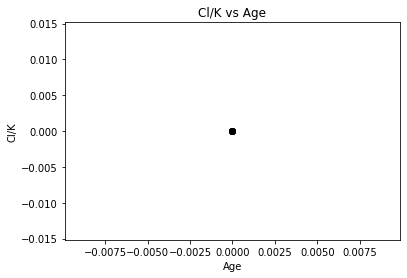

In [128]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

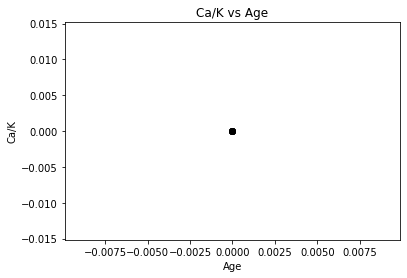

In [129]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

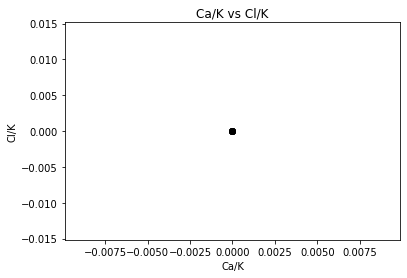

In [130]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

In [131]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

Text(0, 0.5, '36Ar/39Ar')

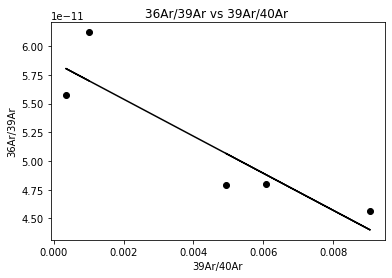

In [132]:
plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [133]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.03630977337987147
y_intercept = 5.862317446742614e-11
slope = -1.6145287896488008e-09


Crea Spectrum Age plot 

In [134]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()

In [135]:
cumulative_df = pd.DataFrame(cumulative)
cumulative_df

,% 39Ar
0,3.583693
1,9.178952
2,26.335051
3,58.001686
4,100.000000


In [136]:
# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])
age_più_2error_df

,Age+2error
0,6.912401e-08
1,1.995985e-07
2,1.142295e-08
3,7.664235e-09
4,1.406263e-08


In [137]:
# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])
age_meno_2error_df

,Age-2error
0,6.912401e-08
1,1.995985e-07
2,1.142295e-08
3,7.664235e-09
4,1.406263e-08


In [138]:
# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns
double_cumulative_df

,% 39Ar
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [139]:
# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})
double_cumulative_df

,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000
9,100.000000


In [140]:
# Cancella l'ultima riga di (Cum%39)
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=9))
double_cumulative_df

,Cum%39
0,3.583693
1,3.583693
2,9.178952
3,9.178952
4,26.335051
5,26.335051
6,58.001686
7,58.001686
8,100.000000


In [141]:
# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index
double_cumulative_df


,Cum%39
0,0.000000
1,3.583693
2,3.583693
3,9.178952
4,9.178952
5,26.335051
6,26.335051
7,58.001686
8,58.001686
9,100.000000


In [142]:
# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns
double_age_più_2error_df

,Age+2error
0,6.912401e-08
1,6.912401e-08
2,1.995985e-07
3,1.995985e-07
4,1.142295e-08
5,1.142295e-08
6,7.664235e-09
7,7.664235e-09
8,1.406263e-08
9,1.406263e-08


In [143]:
# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns
double_age_meno_2error_df

,Age-2error
0,6.912401e-08
1,6.912401e-08
2,1.995985e-07
3,1.995985e-07
4,1.142295e-08
5,1.142295e-08
6,7.664235e-09
7,7.664235e-09
8,1.406263e-08
9,1.406263e-08


In [144]:
# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

,Cum%39,Age+2error,Age-2error
0,0.000000,6.912401e-08,6.912401e-08
1,3.583693,6.912401e-08,6.912401e-08
2,3.583693,1.995985e-07,1.995985e-07
3,9.178952,1.995985e-07,1.995985e-07
4,9.178952,1.142295e-08,1.142295e-08
5,26.335051,1.142295e-08,1.142295e-08
6,26.335051,7.664235e-09,7.664235e-09
7,58.001686,7.664235e-09,7.664235e-09
8,58.001686,1.406263e-08,1.406263e-08
9,100.000000,1.406263e-08,1.406263e-08


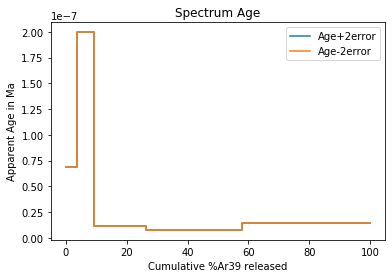

In [145]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error')
plt.title('Spectrum Age')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age in Ma')
plt.legend()